# Scenario with parked vehicles

In [1]:
import sys  
sys.path.insert(0, 'src/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulate_trajectory import step_simulation
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Plot function used for the visualizations

In [13]:
def plot(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(0,120)
    plt.ylim(-40,40)

### Import the scenario

In [3]:
with open("scenario_parked_cars/config_parked.yaml") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
scenario1, _ = CommonRoadFileReader("scenario_parked_cars/DEU_Ffb-1_parked.xml").open()
scenario2, _ = CommonRoadFileReader("scenario_parked_cars/DEU_Ffb-1_parked.xml").open()

### Simulations (It will take some time)

In [4]:
track_vehicle, tracked_scenarios, tracked_views = step_simulation(scenario1, config)
config['tracking_enabled'] = False
no_track_vehicle, not_tracked_scenarios, not_tracked_views = step_simulation(scenario2, config)

### Plots (Same as Figure 12 in the paper)

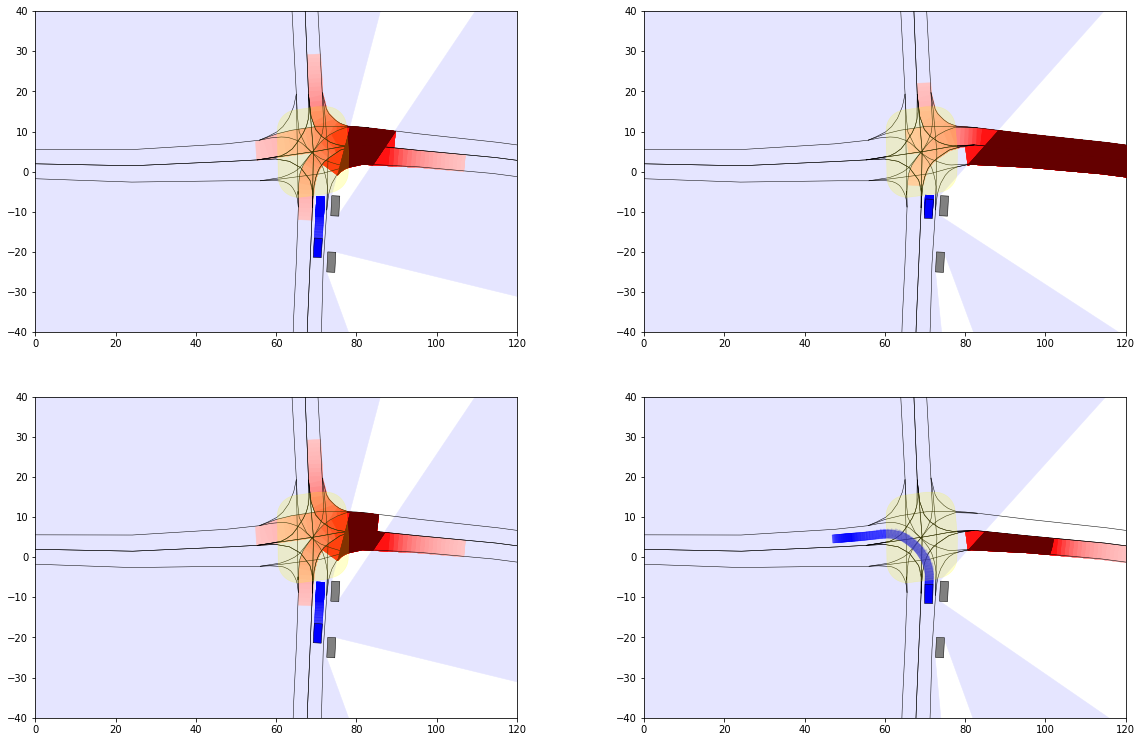

In [14]:
t1 = 5
t2 = 20
fig, ax = plt.subplots(2, 2, figsize=(20,13))
plt.sca(ax[0][0])
plot(t1, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[0][1])
plot(t2, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[1][0])
plot(t1, track_vehicle, tracked_scenarios, tracked_views)
plt.sca(ax[1][1])
plot(t2, track_vehicle, tracked_scenarios, tracked_views)

### Animation of the baseline method

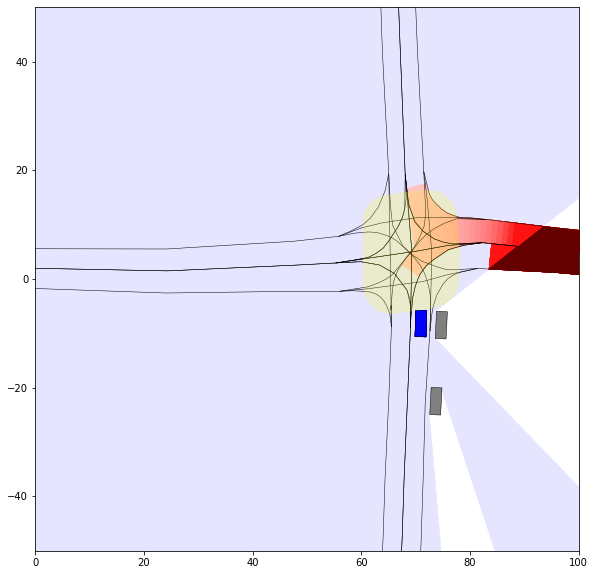

In [10]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[no_track_vehicle, not_tracked_scenarios, not_tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Animation of the proposed method

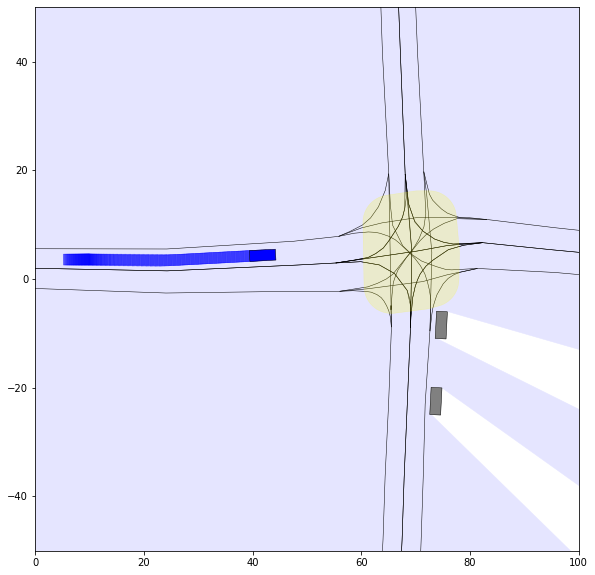

In [9]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[track_vehicle, tracked_scenarios, tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Velocity comparison (Same as Figure 13)

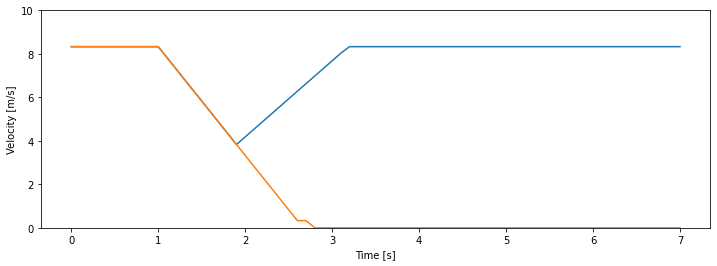

In [15]:
plt.figure(figsize=(12, 4))
labels = ['Proposed method','Baseline method']
for idx, vehicle in enumerate([track_vehicle, no_track_vehicle]):
    velocities = [round(vehicle.initial_state.velocity, 2)]
    time = [round(vehicle.initial_state.time_step/10, 2)]
    for state in vehicle.prediction.trajectory.state_list:
        velocities.append(round(state.velocity, 2))
        time.append(round(state.time_step/10, 2))
    plt.plot(time, velocities, label=labels[idx])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.ylim(0, 10);